# Домашнее задание "Продвинутая линейная алгебра".

## Уровень 0:

Придумайте матрицы, которые обладают следующими свойствами:
- a) Диагональная, ортогональная, но не единичная(!)
- b) Верхнетреугольная, ортогональная
- c) Нижнетреугольная, ортогональная
- d) Матрица, у которой определитель = 1, и все элементы не равны 0

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

Найдите собственные значения и собственные вектора матриц:

- m = np.array([[2, 2],
              [1, 3]])
- print(m)

## Уровень 1:

Найдите спектральное разложение матрицы:

- m = np.array([[1, 2],
              [2,3]])
- print(m)

Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.*

У PCA есть метод transform и inverse_transofrm. Первый - снижает размерность, второй - восстанавливает оригинальные данные с потерей информации. Надо посчитать насколько в среднем точно восстанавливается оригинальная картинка в зависимости от количества компонент в PCA.

В качестве справки можно использовать:

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html - Документация по PCA

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html - Документация по MSE

Картинки цифр можно взять отсюда - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

## Уровень 0:
## Придумайте матрицы, которые обладают следующими свойствами:

### a) Диагональная, ортогональная, но не единичная(!)

In [164]:
import numpy as np

In [165]:
A = np.array([
    [-1, 0],
    [0, -1]
])

In [166]:
At = np.transpose(A)
At

array([[-1,  0],
       [ 0, -1]])

In [167]:
np.dot(At, A)

array([[1, 0],
       [0, 1]])

### b) Верхнетреугольная, ортогональная

In [158]:
B = np.array([
    [1, 0],
    [0, -1]
])

In [159]:
Bt = np.transpose(B)
Bt

array([[ 1,  0],
       [ 0, -1]])

In [160]:
np.dot(Bt, B)

array([[1, 0],
       [0, 1]])

### c) Нижнетреугольная, ортогональная

In [161]:
C = np.array([
    [-1, 0],
    [0, 1]
])

In [162]:
Ct = np.transpose(C)
Ct

array([[-1,  0],
       [ 0,  1]])

In [163]:
np.dot(Ct, C)

array([[1, 0],
       [0, 1]])

### d) Матрица, у которой определитель = 1, и все элементы не равны 0
P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

In [67]:
D = np.array([
    [7, 3],
    [2, 1]
])

In [68]:
np.linalg.det(D)

1.0000000000000002

### Найдите собственные значения и собственные вектора матриц:

In [3]:
m = np.array([[2, 2],
        [1, 3]])
print(m)

[[2 2]
 [1 3]]


In [5]:
w, v = np.linalg.eig(m)

In [6]:
w

array([1., 4.])

In [7]:
v

array([[-0.89442719, -0.70710678],
       [ 0.4472136 , -0.70710678]])

In [8]:
np.dot(m, v)

array([[-0.89442719, -2.82842712],
       [ 0.4472136 , -2.82842712]])

In [11]:
w * v

array([[-0.89442719, -2.82842712],
       [ 0.4472136 , -2.82842712]])

## Уровень 1:

### Найдите спектральное разложение матрицы:


In [168]:
m = np.array([[1, 2],
              [2, 3]])
print(m)

[[1 2]
 [2 3]]


In [178]:
w, v = np.linalg.eig(m)
w, v

(array([-0.23606798,  4.23606798]),
 array([[-0.85065081, -0.52573111],
        [ 0.52573111, -0.85065081]]))

In [179]:
m @ v

array([[ 0.20081142, -2.22703273],
       [-0.12410828, -3.60341465]])

In [239]:
w * v

array([[ 0.20081142, -2.22703273],
       [-0.12410828, -3.60341465]])

In [247]:
S = np.linalg.inv(v)

In [248]:
D = w * np.eye(2)
St = np.linalg.inv(S)

In [249]:
St @ D @ S

array([[1., 2.],
       [2., 3.]])

In [197]:
m

array([[1, 2],
       [2, 3]])

### Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.*

У PCA есть метод transform и inverse_transofrm. Первый - снижает размерность, второй - восстанавливает оригинальные данные с потерей информации. Надо посчитать насколько в среднем точно восстанавливается оригинальная картинка в зависимости от количества компонент в PCA.


In [320]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

In [336]:
# выбор и вывод картинки на экран
digits = load_digits()
print(digits.images[0].shape)
digits.images[0]

(8, 8)


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 432x288 with 0 Axes>

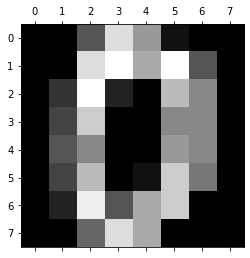

In [337]:
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [355]:
pca = PCA()
digits_reduction = pca.fit_transform(digits.images[0])

In [356]:
digits_restore = pca.inverse_transform(digits_reduction)

<Figure size 432x288 with 0 Axes>

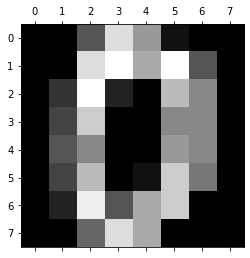

In [357]:
plt.gray() 
plt.matshow(digits_restore) 
plt.show() 

In [358]:
# расчёт точности восстановления через средне квадратическую ошибку, идеальное восстановление 0
y_true = digits.images[0]
y_pred = digits_restore
mean_squared_error(y_true, y_pred)

1.1487786932280984e-29

In [365]:
list_errors = []
components = []
for comp in range(0, 9):
    components.append(comp)
    pca = PCA(n_components = comp)
    digits_reduction = pca.fit_transform(digits.images[0])
    digits_restore = pca.inverse_transform(digits_reduction)
    y_true = digits.images[0]
    y_pred = digits_restore
    list_errors.append(mean_squared_error(y_true, y_pred))

Text(0, 0.5, 'ошибка восстановления (MSE)')

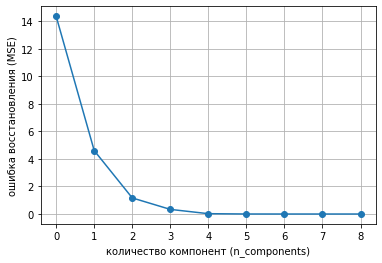

In [395]:
plt.plot(components, list_errors, ls='-', marker='o')
plt.grid()

plt.xlabel('количество компонент (n_components)')
plt.ylabel('ошибка восстановления (MSE)')